# Run Tests
<hr style="border:2px solid gray"> </hr>


In [2]:
import os
import re
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import unittest
import torch
import torchvision
import torchvision.transforms as tvtf

import hw2.experiments as experiments
from hw2.experiments import load_experiment
from cs236781.plot import plot_fit

%matplotlib inline
%load_ext autoreload
%autoreload 2


seed = 42
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.rcParams.update({'font.size': 12})
test = unittest.TestCase()

In [3]:
from hw2.experiments import run_experiment
from torch.optim import SGD, RMSprop
import itertools
import hw2.training as training
import hw2.experiments as experiments
from hw2.experiments import load_experiment
from cs236781.plot import plot_fit

default_args = dict(
    run_name='',
    # Training params
    bs_train=128,
    bs_test=None,
    batches=None,
    epochs=100,
    early_stopping=3,
    checkpoints=None,
    lr=1e-3,
    reg=1e-3,

    # Model params
    filters_per_layer=[64],
    layers_per_block=2,
    pool_every=2,
    hidden_dims=[1024],
    model_type="cnn",
#     pooling_params=dict(kernel_size=2),
#     model_params=dict(
#         conv_params=dict(kernel_size=3, padding=1)
#     )
)

In [4]:
def plot_exp_results(filename_pattern, results_dir='results'):
    fig = None
    result_files = glob.glob(os.path.join(results_dir, filename_pattern))
    result_files.sort()
    if len(result_files) == 0:
        print(f'No results found for pattern {filename_pattern}.', file=sys.stderr)
        return
    for filepath in result_files:
        m = re.match('exp\d_(\d_)?(.*)\.json', os.path.basename(filepath))
        cfg, fit_res = load_experiment(filepath)
        fig, axes = plot_fit(fit_res, fig, legend=m[2],log_loss=True)
    del cfg['filters_per_layer']
    del cfg['layers_per_block']
    print('common config: ', cfg)

In [8]:
def experiment1_1():
    args = default_args.copy()
    args['run_name'] = 'exp1_1'
    Ks = [[32], [64]]
    Ls = [2,  4, 8, 16]
    for K, L in itertools.product(Ks, Ls):
        args['filters_per_layer'] = K
        args['layers_per_block'] = L
        args['pool_every'] = len(K) * L // 2
        run_experiment(**args)

experiment1_1()

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 1.424, Accuracy 47.6): 100%|██████████| 313/313 [00:02<00:00, 137.29it/s]
--- EPOCH 2/100 ---
test_batch (Avg. Loss 1.208, Accuracy 57.0): 100%|██████████| 313/313 [00:02<00:00, 142.63it/s]
--- EPOCH 3/100 ---
test_batch (Avg. Loss 1.061, Accuracy 62.6): 100%|██████████| 313/313 [00:02<00:00, 142.53it/s]
--- EPOCH 4/100 ---
test_batch (Avg. Loss 0.975, Accuracy 66.8): 100%|██████████| 313/313 [00:02<00:00, 143.84it/s]
--- EPOCH 5/100 ---
test_batch (Avg. Loss 0.967, Accuracy 69.3): 100%|██████████| 313/313 [00:02<00:00, 144.52it/s]
--- EPOCH 6/100 ---
test_batch (Avg. Loss 1.257, Accuracy 65.3): 100%|██████████| 313/313 [00:02<00:00, 136.24it/s]
--- EPOCH 7/100 ---
test_batch (Avg. Loss 1.243, Accuracy 69.4): 100%|██████████| 313/313 [00:02<00:00, 142.25it/s]
--- EPOCH 8/100 ---
test_batch (Avg. Loss 1.536, Accuracy 68.6): 100%|██████████| 313/313 [00:02<00:00, 143.21it

In [11]:
def experiment1_2():
    args = default_args.copy()
    args['run_name'] = 'exp1_2'
    Ks = [[32], [64], [128], [256]]
    Ls = [2, 4, 8]
    for K, L in itertools.product(Ks, Ls):
        args['filters_per_layer'] = K
        args['layers_per_block'] = L
        args['pool_every'] = len(K) * L // 2
        run_experiment(**args)
        
experiment1_2()

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 1.385, Accuracy 49.6): 100%|██████████| 313/313 [00:02<00:00, 145.87it/s]
--- EPOCH 2/100 ---
test_batch (Avg. Loss 1.224, Accuracy 56.3): 100%|██████████| 313/313 [00:02<00:00, 142.53it/s]
--- EPOCH 3/100 ---
test_batch (Avg. Loss 1.082, Accuracy 62.2): 100%|██████████| 313/313 [00:02<00:00, 143.89it/s]
--- EPOCH 4/100 ---
test_batch (Avg. Loss 1.012, Accuracy 66.4): 100%|██████████| 313/313 [00:02<00:00, 144.64it/s]
--- EPOCH 5/100 ---
test_batch (Avg. Loss 1.000, Accuracy 67.9): 100%|██████████| 313/313 [00:02<00:00, 144.75it/s]
--- EPOCH 6/100 ---
test_batch (Avg. Loss 1.144, Accuracy 66.7): 100%|██████████| 313/313 [00:02<00:00, 144.87it/s]
--- EPOCH 7/100 ---
test_batch (Avg. Loss 1.221, Accuracy 67.5): 100%|██████████| 313/313 [00:02<00:00, 147.50it/s]
--- EPOCH 8/100 ---
test_batch (Avg. Loss 1.341, Accuracy 68.4): 100%|██████████| 313/313 [00:02<00:00, 149.81it

In [12]:
def experiment1_3():
    args = default_args.copy()
    args['run_name'] = 'exp1_3'
    Ks = [[64, 128, 256]]
    Ls = [1, 2, 3, 4]
    for K, L in itertools.product(Ks, Ls):
        args['filters_per_layer'] = K
        args['layers_per_block'] = L
        args['pool_every'] = len(K) * L // 2
        run_experiment(**args)

experiment1_3()

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 1.460, Accuracy 46.1): 100%|██████████| 313/313 [00:02<00:00, 142.11it/s]
--- EPOCH 2/100 ---
test_batch (Avg. Loss 1.311, Accuracy 54.7): 100%|██████████| 313/313 [00:02<00:00, 144.74it/s]
--- EPOCH 3/100 ---
test_batch (Avg. Loss 0.934, Accuracy 67.7): 100%|██████████| 313/313 [00:02<00:00, 143.04it/s]
--- EPOCH 4/100 ---
test_batch (Avg. Loss 0.847, Accuracy 71.9): 100%|██████████| 313/313 [00:02<00:00, 141.71it/s]
--- EPOCH 5/100 ---
test_batch (Avg. Loss 0.926, Accuracy 71.5): 100%|██████████| 313/313 [00:02<00:00, 141.17it/s]
--- EPOCH 6/100 ---
test_batch (Avg. Loss 1.119, Accuracy 71.2): 100%|██████████| 313/313 [00:02<00:00, 140.07it/s]
--- EPOCH 7/100 ---
test_batch (Avg. Loss 1.095, Accuracy 74.0): 100%|██████████| 313/313 [00:02<00:00, 141.57it/s]
--- EPOCH 8/100 ---
test_batch (Avg. Loss 1.294, Accuracy 73.5): 100%|██████████| 313/313 [00:02<00:00, 141.64it

In [25]:
def experiment1_4():
    args = default_args.copy()
    args['run_name'] = 'exp1_4'
    args['model_type'] = 'resnet'
    args['early_stopping'] = 7

    Ks = [[32]]
    Ls = [8, 16, 32]
    for K, L in itertools.product(Ks, Ls):
        args['filters_per_layer'] = K
        args['layers_per_block'] = L
        args['pool_every'] = len(K) * L // 2
        run_experiment(**args)

    Ks = [[64, 128, 256]]
    Ls = [2, 4, 8]
#     Ls = [2]
#     Ls = [4]
#     Ls = [8]
#     Ls = [ 8]
    for K, L in itertools.product(Ks, Ls):
        args['filters_per_layer'] = K
        args['layers_per_block'] = L
        args['pool_every'] = len(K) * L // 2
        args['pool_every'] = len(K) * L // 2 +3
        args['pool_every'] = len(K) * L // 2 +1

#         args['pool_every'] = 8
        print(args['pool_every'])
        run_experiment(**args)

    
experiment1_4()

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 1.507, Accuracy 46.0): 100%|██████████| 313/313 [00:02<00:00, 130.25it/s]
--- EPOCH 2/100 ---
test_batch (Avg. Loss 1.161, Accuracy 58.6): 100%|██████████| 313/313 [00:02<00:00, 130.15it/s]
--- EPOCH 3/100 ---
test_batch (Avg. Loss 0.938, Accuracy 67.0): 100%|██████████| 313/313 [00:02<00:00, 129.86it/s]
--- EPOCH 4/100 ---
test_batch (Avg. Loss 0.891, Accuracy 69.8): 100%|██████████| 313/313 [00:02<00:00, 130.48it/s]
--- EPOCH 5/100 ---
test_batch (Avg. Loss 0.899, Accuracy 70.8): 100%|██████████| 313/313 [00:02<00:00, 130.30it/s]
--- EPOCH 6/100 ---
test_batch (Avg. Loss 0.953, Accuracy 72.5): 100%|██████████| 313/313 [00:02<00:00, 130.24it/s]
--- EPOCH 7/100 ---
test_batch (Avg. Loss 1.099, Accuracy 72.6): 100%|██████████| 313/313 [00:02<00:00, 130.56it/s]
--- EPOCH 8/100 ---
test_batch (Avg. Loss 1.314, Accuracy 73.6): 100%|██████████| 313/313 [00:02<00:00, 129.11it

### Our Convolution Network
---

In [14]:
# exp_name = 'exp2'
# kernels = [32, 64, 128]
# list_layers = [3, 6, 9, 12]
# pools = 2
# for layers in list_layers:
#     experiments.run_experiment(
#         exp_name, seed=seed, bs_train=50, batches=10, epochs=10, early_stopping=5,
#         filters_per_layer=kernels, layers_per_block=layers, pool_every=pools, hidden_dims=[100],
#         model_type='ycn',
#     )

def experiment2():
    args = default_args.copy()
    args['run_name'] = 'exp2'
    args['model_type'] = 'ycn'
    args['early_stopping'] = 5
    Ks = [ [32, 64, 128]]
    Ls = [3,6,9,12]

    args['filters_per_layer'] = [32, 64, 128]
    
    args['layers_per_block'] = 5
    args['pool_every'] = 5
    print(args['pool_every'])
    run_experiment(**args)
    
    args['layers_per_block'] = 6
    args['pool_every'] = 6
    print(args['pool_every'])
    run_experiment(**args)
    
    args['layers_per_block'] = 9
    args['pool_every'] = 9
    print(args['pool_every'])
    run_experiment(**args)
    
    args['layers_per_block'] = 12
    args['pool_every'] = 12
    print(args['pool_every'])
    run_experiment(**args)
    
    
experiment2()

5
Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 1.719, Accuracy 37.6): 100%|██████████| 313/313 [00:03<00:00, 101.43it/s]
--- EPOCH 2/100 ---
test_batch (Avg. Loss 1.537, Accuracy 47.5): 100%|██████████| 313/313 [00:03<00:00, 101.78it/s]
--- EPOCH 3/100 ---
test_batch (Avg. Loss 1.073, Accuracy 62.7): 100%|██████████| 313/313 [00:03<00:00, 100.51it/s]
--- EPOCH 4/100 ---
test_batch (Avg. Loss 1.054, Accuracy 63.8): 100%|██████████| 313/313 [00:03<00:00, 100.64it/s]
--- EPOCH 5/100 ---
test_batch (Avg. Loss 0.896, Accuracy 69.0): 100%|██████████| 313/313 [00:03<00:00, 100.41it/s]
--- EPOCH 6/100 ---
test_batch (Avg. Loss 0.985, Accuracy 68.2): 100%|██████████| 313/313 [00:03<00:00, 100.61it/s]
--- EPOCH 7/100 ---
test_batch (Avg. Loss 0.914, Accuracy 71.7): 100%|██████████| 313/313 [00:03<00:00, 100.50it/s]
--- EPOCH 8/100 ---
test_batch (Avg. Loss 0.986, Accuracy 70.6): 100%|██████████| 313/313 [00:03<00:00, 101.03

# Plot Results From JSON files
<hr style="border:2px solid gray"> </hr>


#### Experiment 1.1
---

common config:  {'run_name': 'exp1_1', 'out_dir': './results', 'seed': 1169971891, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 4, 'hidden_dims': [1024], 'model_type': 'cnn', 'kw': {}}


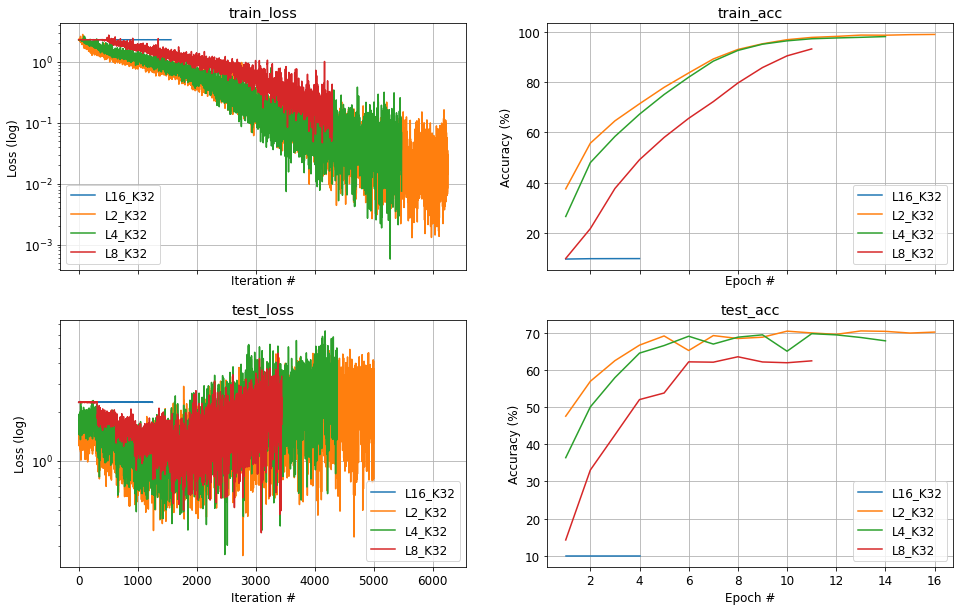

In [6]:
plot_exp_results('exp1_1_L*_K32*.json')

common config:  {'run_name': 'exp1_1', 'out_dir': './results', 'seed': 1535192276, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 4, 'hidden_dims': [1024], 'model_type': 'cnn', 'kw': {}}


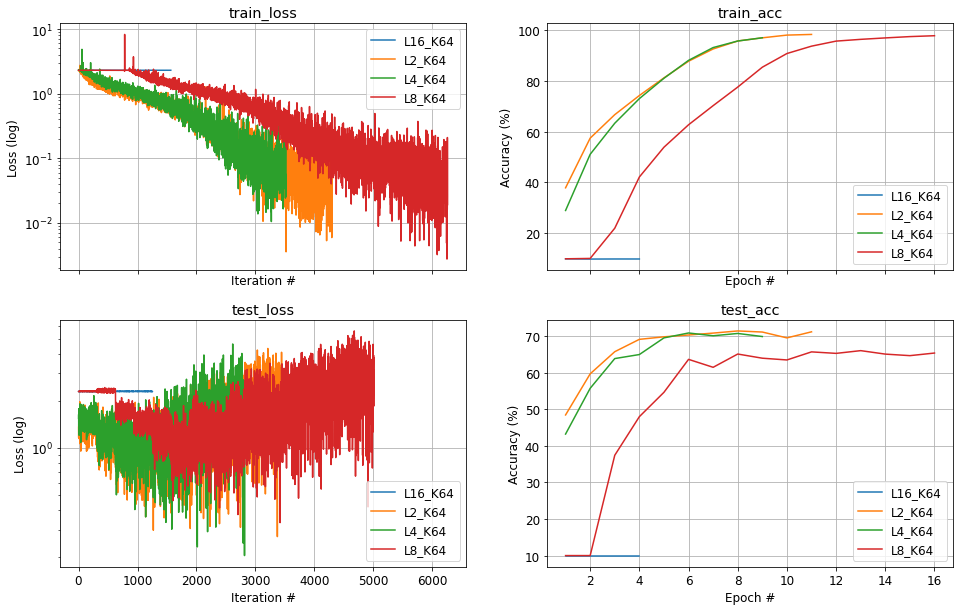

In [7]:
plot_exp_results('exp1_1_L*_K64*.json')

#### Experiment 1.2
---

common config:  {'run_name': 'exp1_2', 'out_dir': './results', 'seed': 542416715, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 1, 'hidden_dims': [1024], 'model_type': 'cnn', 'kw': {}}


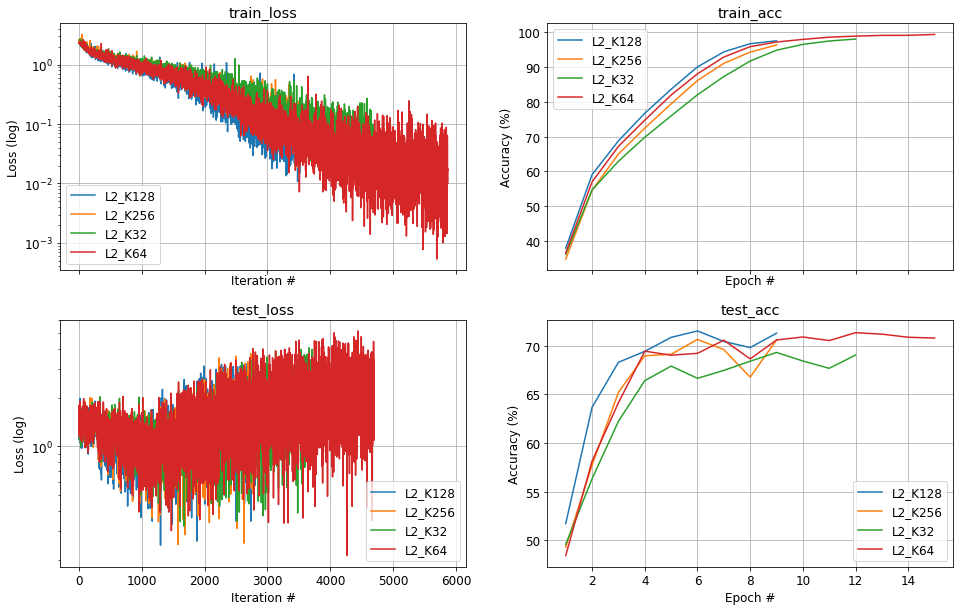

In [8]:
plot_exp_results('exp1_2_L2*.json')

common config:  {'run_name': 'exp1_2', 'out_dir': './results', 'seed': 905920244, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 2, 'hidden_dims': [1024], 'model_type': 'cnn', 'kw': {}}


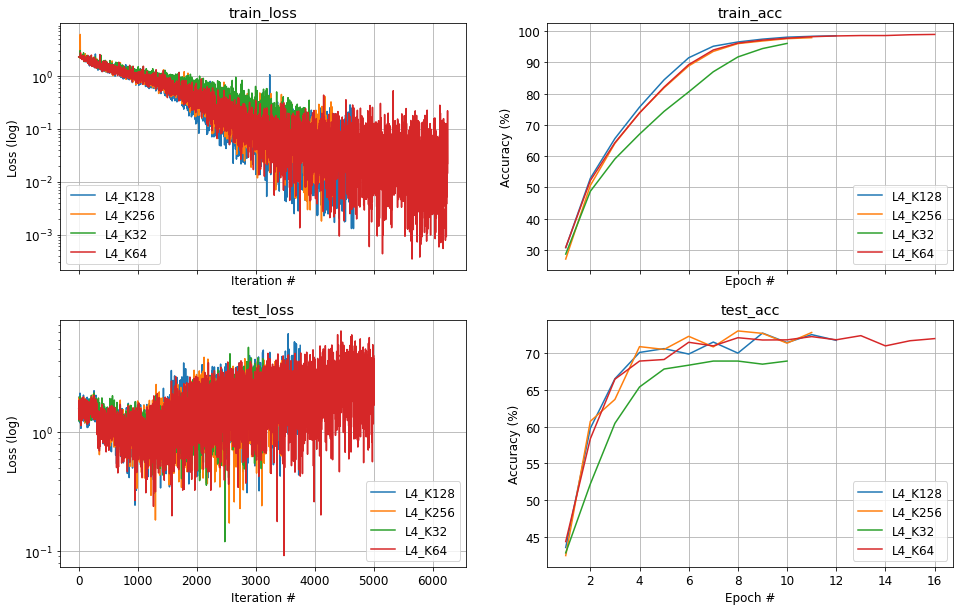

In [9]:
plot_exp_results('exp1_2_L4*.json')

common config:  {'run_name': 'exp1_2', 'out_dir': './results', 'seed': 1380904122, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 4, 'hidden_dims': [1024], 'model_type': 'cnn', 'kw': {}}


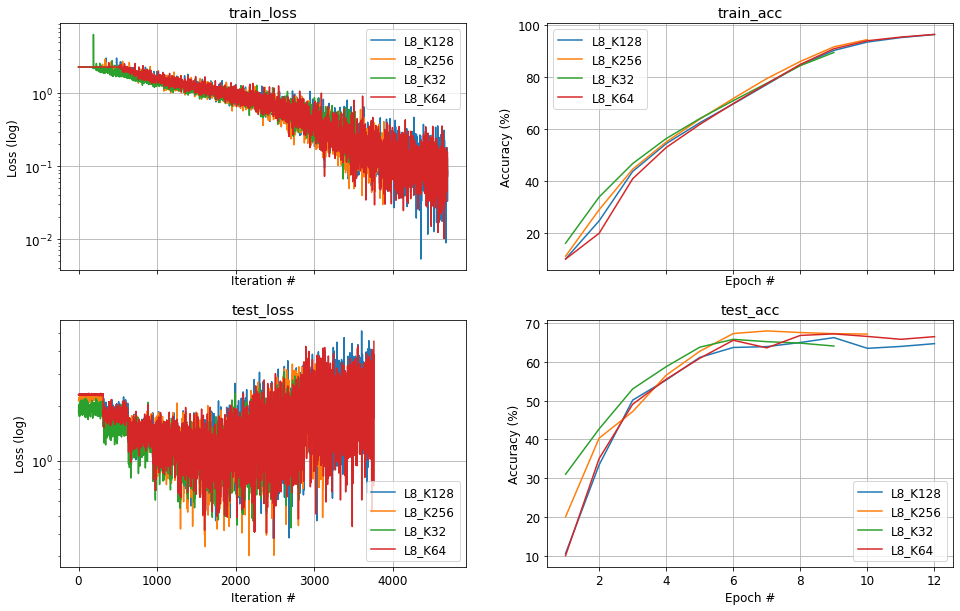

In [10]:
plot_exp_results('exp1_2_L8*.json')

#### Experiment 1.3
---

common config:  {'run_name': 'exp1_3', 'out_dir': './results', 'seed': 1334623621, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 6, 'hidden_dims': [1024], 'model_type': 'cnn', 'kw': {}}


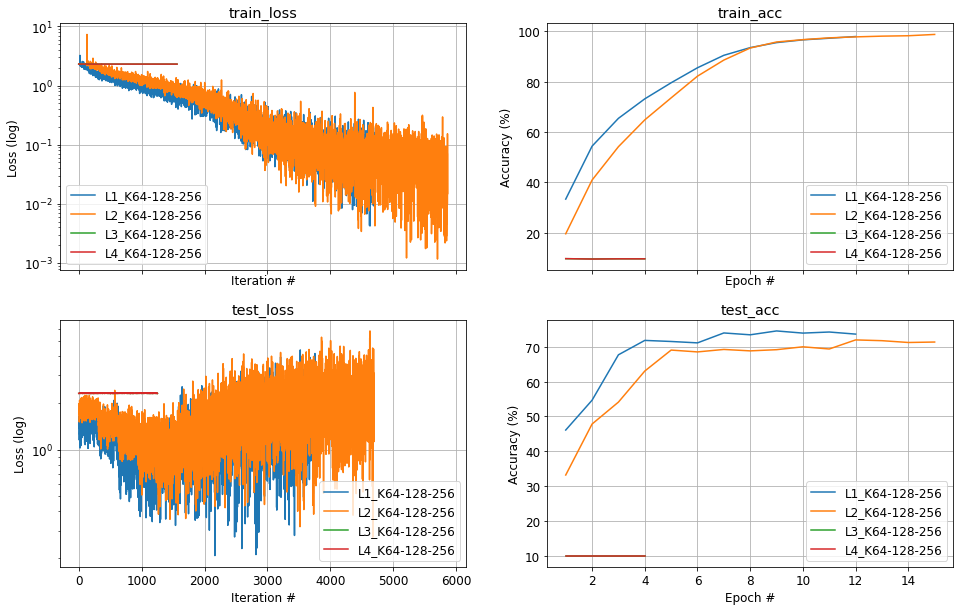

In [11]:
plot_exp_results('exp1_3*.json')

#### Experiment 1.4
---

common config:  {'run_name': 'exp1_4', 'out_dir': './results', 'seed': 1092702449, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 7, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 4, 'hidden_dims': [1024], 'model_type': 'resnet', 'kw': {}}


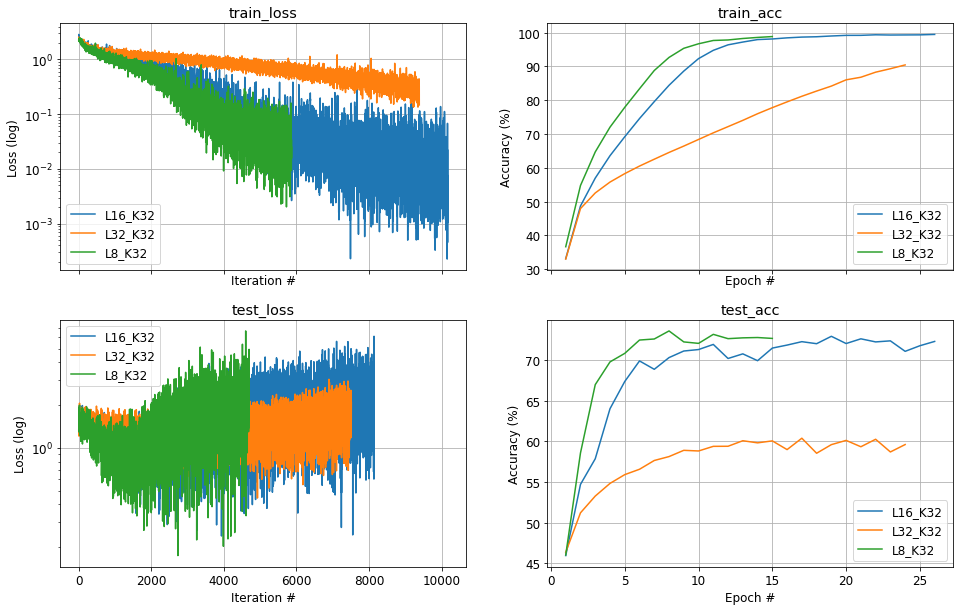

In [12]:
plot_exp_results('exp1_4_L*_K32.json')

common config:  {'run_name': 'exp1_4', 'out_dir': './results', 'seed': 86659440, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 7, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 13, 'hidden_dims': [1024], 'model_type': 'resnet', 'kw': {}}


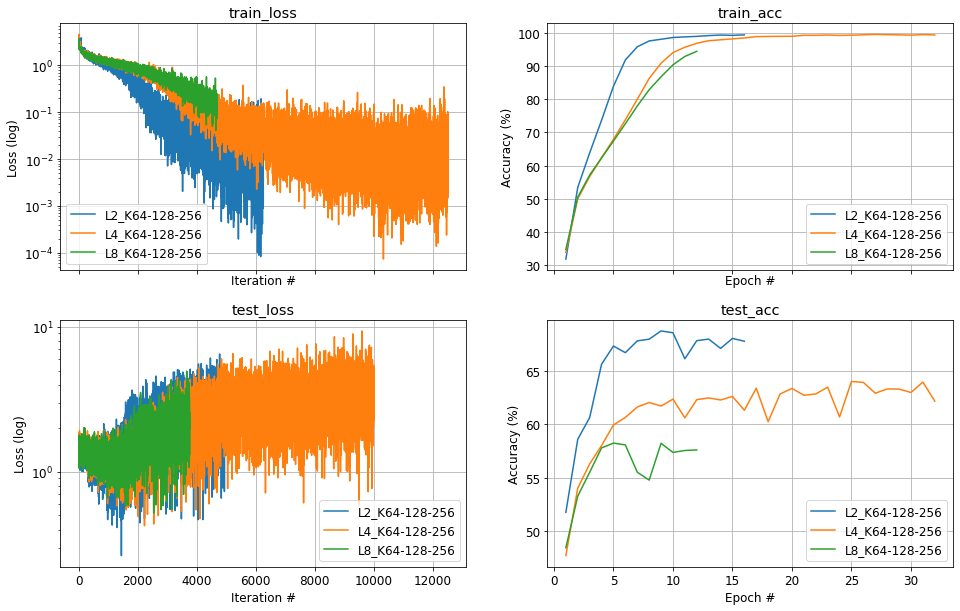

In [13]:
plot_exp_results('exp1_4_L*_K64*.json')

#### Experiment 2
---

common config:  {'run_name': 'exp2', 'out_dir': './results', 'seed': 220585850, 'device': None, 'bs_train': 128, 'bs_test': 32, 'batches': None, 'epochs': 100, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.001, 'reg': 0.001, 'pool_every': 9, 'hidden_dims': [1024], 'model_type': 'ycn', 'kw': {}}


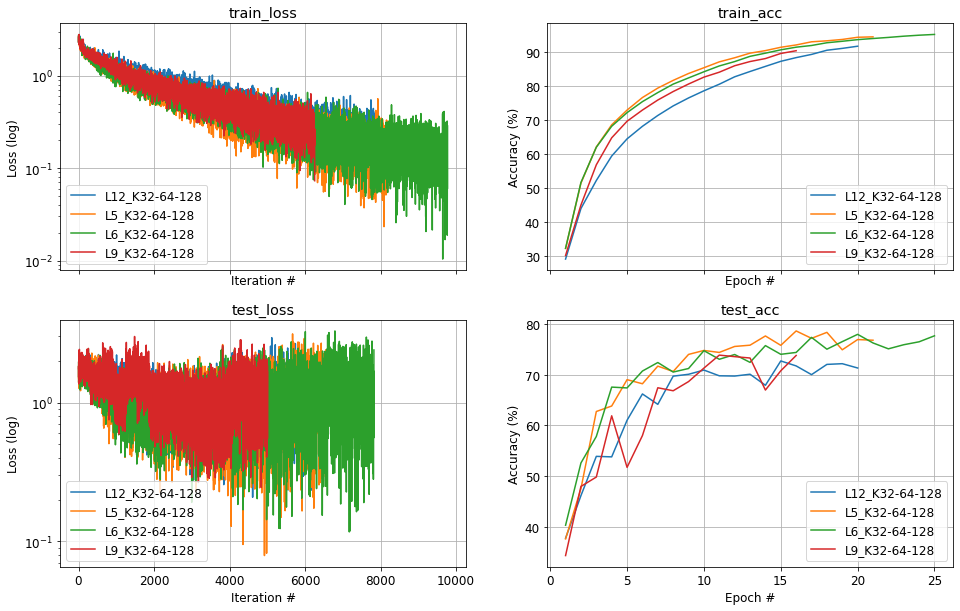

In [14]:
plot_exp_results('exp2*.json')